## 1.Import Modules

In [0]:
!pip install mlxtend
!pip install networkx

In [0]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 2. Read Files

In [0]:
# accessing cleaned file
attrDF = (spark.read
  .option("inferSchema", True)
  .json("/FileStore/tables/Project_Data_Extract/attributes.json"))

attrDF.display()

In [0]:
bizDF = (spark.read
  .option("inferSchema", True)
  .json("/FileStore/tables/Project_Data_Extract/business_filtered.json"))

bizDF.display()

address,business_id,business_perf,categories,city,cluster,latitude,longitude,name,postal_code,review_ave_stars,review_count,review_ss,state,tips_count,tips_ss
3164 NW 185th Ave,Agq4zoNLSIpT1_ZJbnrvww,Good,"Food, Donuts",portland,1,45.5429252,-122.8662879,Donut Palace,97229,4.285714285714286,173,0.8146031746031747,OR,13,0.4414153846153846
187 Elm St,bxy3khT-2R66tcdKjFa2pw,Good,"Restaurants, Seafood, Italian, Pizza",somerville,1,42.3930843,-71.1202673,Posto,02144,4.1866666666666665,910,0.8298826666666667,MA,90,0.34740777777777776
"12251 Number 1 Road, Suite 140",3KqpiLDAjeeMmZeU-Il_ng,Poor,"Japanese, Restaurants, Sushi Bars",richmond,2,49.1245685,-123.1815968,Yokohama Teppanyaki,V7E 1T6,2.0833333333333335,80,0.27915833333333334,BC,8,0.3193
1487 Dorchester Ave,TYDCjEMga3cm7k638hKhTg,Good,"Chinese, Vietnamese, Restaurants",dorchester,1,42.2999809,-71.0604396,Hien Vuong Restaurant,02122,4.142857142857143,36,0.7781142857142858,MA,9,0.2989666666666667
6815 E Broad St,KpdYtK2KtLxEzYNW38XKZQ,Poor,"Restaurants, Fast Food, Mexican",columbus,2,39.9806544587,-82.821739,Chipotle Mexican Grill,43213,1.7857142857142858,43,0.09112857142857145,OH,12,-0.014208333333333331
"730 W Sand Lake Rd, Ste 30",f3teByaeIKPTYetAawUtxg,Good,"Restaurants, Breakfast & Brunch, Cuban, Latin American",orlando,1,28.4500355797,-81.3879469963,Café Pinar,32809,4.580645161290323,167,0.7474806451612903,FL,25,0.528368
1410 State Rd 436,GrLNk_EE831QDAhaSAZpWA,Good,"Latin American, Cocktail Bars, Restaurants, Colombian, Gastropubs, Nightlife, Bars",casselberry,1,28.627566,-81.316263,Capachos Bar & Grill,32707,3.888888888888889,17,0.8434055555555555,FL,4,0.316575
4315 W Lake Mary Blvd,Hhc8Ix8sygBjqFbiO1c1TQ,Average,"Mexican, Fast Food, Restaurants",lake mary,0,28.7556732126,-81.350758338,Chipotle Mexican Grill,32746,2.75,60,0.29228750000000003,FL,28,0.35261785714285715
197 Massachusetts Ave,zeqEqgEmTY3c7HkJmHrw2g,Average,"Italian, Sandwiches, Fast Food, Pizza, Restaurants",lexington,0,42.4261588,-71.196419,Nick's Place,02420,3.1666666666666665,89,0.5297499999999999,MA,10,0.46006
"520 SW 6th Ave, Ste 105",O_BAT_rvszHYBNEM6z0tcQ,Poor,"Sandwiches, Desserts, Food, Salad, Fast Food, Restaurants",portland,2,45.5199352739,-122.677917119,Subway,97204,2.0,20,-0.3145200000000001,OR,6,0.33155


In [0]:
biz_pdf=bizDF.toPandas()
attr_pdf=attrDF.toPandas()

## 3. Data Preparation

In [0]:
biz_attr_pdf = pd.merge(biz_pdf, attr_pdf, how="inner", on=["business_id"])

In [0]:
del biz_attr_pdf["address"]
del biz_attr_pdf["categories"]
del biz_attr_pdf["latitude"]
del biz_attr_pdf["longitude"]
del biz_attr_pdf["postal_code"]
del biz_attr_pdf["tips_count"]
del biz_attr_pdf["review_count"]
del biz_attr_pdf["tips_ss"]
del biz_attr_pdf["review_ss"]
del biz_attr_pdf["review_ave_stars"]
del biz_attr_pdf["RestaurantsPriceRange"]
del biz_attr_pdf["cluster"]
biz_attr_pdf.drop(columns=["AcceptsInsurance","AgesAllowed","RestaurantsCounterService","Open24Hours"],inplace=True)

In [0]:
columns=biz_attr_pdf.columns
for i in columns:
    biz_attr_pdf[i]=biz_attr_pdf[i].replace("True", True, regex=True) 
    biz_attr_pdf[i]=biz_attr_pdf[i].replace("False", False, regex=True) 
    print(i,biz_attr_pdf[i].unique())

business_id ['Agq4zoNLSIpT1_ZJbnrvww' 'bxy3khT-2R66tcdKjFa2pw'
 '3KqpiLDAjeeMmZeU-Il_ng' ... 'AHLb2a61KeB80ZeThsOKUg'
 '3vk3lqLx8Yevr_1bJ8xCXw' 'hMhISKYB-2-oDnEFEU-e0g']
business_perf ['Good' 'Poor' 'Average']
city ['portland' 'somerville' 'richmond' 'dorchester' 'columbus' 'orlando'
 'casselberry' 'lake mary' 'lexington' 'austin' 'boulder' 'atlanta'
 'boston' 'medford' 'powell' 'westerville' 'melrose' 'brookline'
 'vancouver' 'cambridge' 'stoneham' 'clermont' 'burnaby' 'randolph'
 'port moody' 'sanford' 'winter park' 'clackamas' 'ocoee' 'kissimmee'
 'roxbury' 'grove port' 'college park' 'hilliard' 'lake oswego'
 'louisville' 'dripping springs' 'roslindale' 'gahanna' 'east point'
 'north vancouver' 'beaverton' 'braintree' 'delta' 'lake buena vista'
 'delaware' 'canal winchester' 'sunset valley' 'gresham'
 'altamonte springs' 'decatur' 'brighton' 'reading' 'smyrna' 'coquitlam'
 'gladstone' 'oregon city' 'newton' 'arlington' 'westwood' 'quincy'
 'pflugerville' 'waltham' 'tualatin' 'cocoa

In [0]:
def alcohol(type):
    if type=="full_bar":
        return True
    else:
        return False

biz_attr_pdf["Full_Bar"]=biz_attr_pdf["Alcohol"].apply(alcohol)

def alcohol_2(type):
    if type=="beer_and_wine":
        return True
    else:
        return False

biz_attr_pdf["Beer_Wine"]=biz_attr_pdf["Alcohol"].apply(alcohol_2)
del biz_attr_pdf["Alcohol"]

In [0]:
def ambience_1(type):
    if type=="classy":
        return True
    else:
        return False

biz_attr_pdf["Classy"]=biz_attr_pdf["Ambience"].apply(ambience_1)

def ambience_2(type):
    if type=="casual":
        return True
    else:
        return False

biz_attr_pdf["Causal"]=biz_attr_pdf["Ambience"].apply(ambience_2)

def ambience_3(type):
    if type=="initmate":
        return True
    else:
        return False

biz_attr_pdf["Intimate"]=biz_attr_pdf["Ambience"].apply(ambience_3)

def ambience_4(type):
    if type=="hipster":
        return True
    else:
        return False

biz_attr_pdf["Hipster"]=biz_attr_pdf["Ambience"].apply(ambience_4)

def ambience_5(type):
    if type=="upscale":
        return True
    else:
        return False

biz_attr_pdf["Upscale"]=biz_attr_pdf["Ambience"].apply(ambience_5)

def ambience_6(type):
    if type=="touristy":
        return True
    else:
        return False

biz_attr_pdf["Touristy"]=biz_attr_pdf["Ambience"].apply(ambience_6)

def ambience_7(type):
    if type=="divey":
        return True
    else:
        return False

biz_attr_pdf["Divey"]=biz_attr_pdf["Ambience"].apply(ambience_7)

def ambience_8(type):
    if type=="trendy":
        return True
    else:
        return False

biz_attr_pdf["Trendy"]=biz_attr_pdf["Ambience"].apply(ambience_8)

def ambience_9(type):
    if type=="romantic":
        return True
    else:
        return False

biz_attr_pdf["Romantic"]=biz_attr_pdf["Ambience"].apply(ambience_9)

del biz_attr_pdf["Ambience"]


In [0]:
def byob_cork(type):
    if type=="free":
        return True
    else:
        return False

biz_attr_pdf["BYOB_Free"]=biz_attr_pdf["BYOBCorkage"].apply(byob_cork)

def byob_cork_2(type):
    if type=="paid":
        return True
    else:
        return False

biz_attr_pdf["BYOB_paid"]=biz_attr_pdf["BYOBCorkage"].apply(byob_cork_2)

del biz_attr_pdf["BYOBCorkage"]

In [0]:
def businessParking_1(type):
    if type=="lot":
        return True
    else:
        return False

biz_attr_pdf["businessParking_lot"]=biz_attr_pdf["BusinessParking"].apply(businessParking_1)

def businessParking_2(type):
    if type=="street":
        return True
    else:
        return False

biz_attr_pdf["businessParking_street"]=biz_attr_pdf["BusinessParking"].apply(businessParking_2)

def businessParking_3(type):
    if type=="valet":
        return True
    else:
        return False

biz_attr_pdf["businessParking_valet"]=biz_attr_pdf["BusinessParking"].apply(businessParking_3)

def businessParking_4(type):
    if type=="garage":
        return True
    else:
        return False

biz_attr_pdf["businessParking_garage"]=biz_attr_pdf["BusinessParking"].apply(businessParking_4)

def businessParking_5(type):
    if type=="validated":
        return True
    else:
        return False

biz_attr_pdf["businessParking_validated"]=biz_attr_pdf["BusinessParking"].apply(businessParking_5)

del biz_attr_pdf["BusinessParking"]

In [0]:
def dietary_res_1(type):
    if type=="vegetarian":
        return True
    else:
        return False

biz_attr_pdf["Diet_Res_Vegetarian"]=biz_attr_pdf["DietaryRestrictions"].apply(dietary_res_1)

def dietary_res_2(type):
    if type=="gluten-free":
        return True
    else:
        return False

biz_attr_pdf["Diet_Res_gluten-free"]=biz_attr_pdf["DietaryRestrictions"].apply(dietary_res_2)

def dietary_res_3(type):
    if type=="vegan":
        return True
    else:
        return False

biz_attr_pdf["Diet_Res_vegan"]=biz_attr_pdf["DietaryRestrictions"].apply(dietary_res_3)

del biz_attr_pdf["DietaryRestrictions"]

In [0]:
def music_1(type):
    if type=="live":
        return True
    else:
        return False

biz_attr_pdf["Music_live"]=biz_attr_pdf["Music"].apply(music_1)

def music_2(type):
    if type=="background_music":
        return True
    else:
        return False

biz_attr_pdf["Music_background_music"]=biz_attr_pdf["Music"].apply(music_2)

def music_3(type):
    if type=="jukebox":
        return True
    else:
        return False

biz_attr_pdf["Music_jukebox"]=biz_attr_pdf["Music"].apply(music_3)

def music_4(type):
    if type=="live":
        return True
    else:
        return False

biz_attr_pdf["Music_live"]=biz_attr_pdf["Music"].apply(music_4)

def music_5(type):
    if type=="karaoke":
        return True
    else:
        return False

biz_attr_pdf["Music_karaoke"]=biz_attr_pdf["Music"].apply(music_5)

def music_6(type):
    if type=="dj":
        return True
    else:
        return False

biz_attr_pdf["Music_dj"]=biz_attr_pdf["Music"].apply(music_6)

def music_7(type):
    if type=="video":
        return True
    else:
        return False

biz_attr_pdf["Music_video"]=biz_attr_pdf["Music"].apply(music_7)

del biz_attr_pdf["Music"]

In [0]:
def noiselevel_1(type):
    if type=="quiet":
        return True
    else:
        return False

biz_attr_pdf["Noiselvl_quiet"]=biz_attr_pdf["NoiseLevel"].apply(noiselevel_1)

def noiselevel_2(type):
    if type=="average":
        return True
    else:
        return False

biz_attr_pdf["Noiselvl_average"]=biz_attr_pdf["NoiseLevel"].apply(noiselevel_2)

def noiselevel_3(type):
    if type=="loud":
        return True
    else:
        return False

biz_attr_pdf["Noiselvl_loud"]=biz_attr_pdf["NoiseLevel"].apply(noiselevel_3)

def noiselevel_4(type):
    if type=="very_loud":
        return True
    else:
        return False

biz_attr_pdf["Noiselvl_vloud"]=biz_attr_pdf["NoiseLevel"].apply(noiselevel_4)

del biz_attr_pdf["NoiseLevel"]

In [0]:
def attire_1(type):
    if type=="causal":
        return True
    else:
        return False

biz_attr_pdf["attire_casual"]=biz_attr_pdf["RestaurantsAttire"].apply(attire_1)

def attire_2(type):
    if type=="dressy":
        return True
    else:
        return False

biz_attr_pdf["attire_dressy"]=biz_attr_pdf["RestaurantsAttire"].apply(attire_2)

def attire_3(type):
    if type=="formal":
        return True
    else:
        return False

biz_attr_pdf["attire_formal"]=biz_attr_pdf["RestaurantsAttire"].apply(attire_3)

del biz_attr_pdf["RestaurantsAttire"]

In [0]:
def smoking(type):
    if type=="outdoor":
        return True
    else:
        return False

biz_attr_pdf["smoking_outdoor"]=biz_attr_pdf["Smoking"].apply(smoking)

del biz_attr_pdf["Smoking"]

In [0]:
def WiFi_1(type):
    if type=="free":
        return True
    else:
        return False

biz_attr_pdf["WiFi_free"]=biz_attr_pdf["WiFi"].apply(WiFi_1)

def WiFi_2(type):
    if type=="paid":
        return True
    else:
        return False

biz_attr_pdf["WiFi_paid"]=biz_attr_pdf["WiFi"].apply(WiFi_2)

del biz_attr_pdf["WiFi"]

In [0]:
def price_range_1(type):
    if type=="1":
        return True
    else:
        return False

biz_attr_pdf["price_range_under10"]=biz_attr_pdf["RestaurantsPriceRange2"].apply(price_range_1)

def price_range_2(type):
    if type=="2":
        return True
    else:
        return False

biz_attr_pdf["price_range_11-30"]=biz_attr_pdf["RestaurantsPriceRange2"].apply(price_range_2)

def price_range_3(type):
    if type=="3":
        return True
    else:
        return False

biz_attr_pdf["price_range_31-60"]=biz_attr_pdf["RestaurantsPriceRange2"].apply(price_range_3)

def price_range_4(type):
    if type=="4":
        return True
    else:
        return False

biz_attr_pdf["price_range_over61"]=biz_attr_pdf["RestaurantsPriceRange2"].apply(price_range_4)

del biz_attr_pdf["RestaurantsPriceRange2"]

## 4. Extract Good Performing Businesses

In [0]:
biz_attr_pdf_GA=biz_attr_pdf.loc[biz_attr_pdf['state'] == "GA"]
biz_attr_pdf_GA_good=biz_attr_pdf_GA.loc[biz_attr_pdf_GA['business_perf'] == "Good"]

In [0]:
del biz_attr_pdf_GA_good["address"]
del biz_attr_pdf_GA_good["business_id"]
del biz_attr_pdf_GA_good["categories"]
del biz_attr_pdf_GA_good["latitude"]
del biz_attr_pdf_GA_good["longitude"]
del biz_attr_pdf_GA_good["postal_code"]
del biz_attr_pdf_GA_good["tips_count"]
del biz_attr_pdf_GA_good["review_count"]
del biz_attr_pdf_GA_good["tips_ss"]
del biz_attr_pdf_GA_good["review_ss"]
del biz_attr_pdf_GA_good["review_ave_stars"]
del biz_attr_pdf_GA_good["name"]
del biz_attr_pdf_GA_good["RestaurantsPriceRange"]
del biz_attr_pdf_GA_good["cluster"]
del biz_attr_pdf_GA_good["business_perf"]
del biz_attr_pdf_GA_good["state"]
del biz_attr_pdf_GA_good["city"]

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3079             try:
-> 3080                 return self._engine.get_loc(casted_key)
   3081             except KeyError as err:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'address'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<command-1112145145491328> in <module>
----> 1 del biz_attr_pdf_GA_good["address"]
      2 del biz_attr

In [0]:
columns=biz_attr_pdf_GA_good.columns
for i in columns:
    biz_attr_pdf_GA_good[i]=biz_attr_pdf_GA_good[i].replace("True", True, regex=True) 
    biz_attr_pdf_GA_good[i]=biz_attr_pdf_GA_good[i].replace("False", False, regex=True) 

<command-1430807429859796>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_attr_pdf_GA_good[i]=biz_attr_pdf_GA_good[i].replace("True", True, regex=True)
<command-1430807429859796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_attr_pdf_GA_good[i]=biz_attr_pdf_GA_good[i].replace("False", False, regex=True)


## 5. EDA

In [0]:
import numpy as np
cols=biz_attr_pdf_GA_good.columns
incident_count=[]
for i in cols:
    count=biz_attr_pdf_GA_good[i].value_counts()
    count=dict(count)
    if True in count:
        incident_count.append(count[True])
    else:
        incident_count.append(0)
    

incident_count = np.array(incident_count)
cols = np.array(cols)


d = {"Attribute": cols, "Count": incident_count}
df_table= pd.DataFrame(d)
df_table = df_table.sort_values(by=['Count'], ascending=False)

df_table.head(10).style.background_gradient(cmap='Blues')

,Attribute,Count
3,BusinessAcceptsCreditCards,1621
19,RestaurantsTakeOut,1403
16,RestaurantsGoodForGroups,1164
1,BikeParking,1093
49,Noiselvl_average,1030
34,businessParking_lot,995
11,GoodForKids,985
59,price_range_11-30,978
56,WiFi_free,929
15,RestaurantsDelivery,927


In [0]:
import plotly.express as px

df_table["Attributes"] = "Attributes" # to have a same origin

 
fig = px.treemap(df_table.head(30), path=['Attributes', "Attribute"], values='Count',
                  color=df_table["Count"].head(30), hover_data=['Attribute'],
                  color_continuous_scale='Blues',width=1500, height=800
                  )

fig.show()

## 6. Apply Apriori Alogrithm

In [0]:
frequent_itemsets=apriori(biz_attr_pdf_GA_good,min_support=0.52,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending=False)

In [0]:
frequent_itemsets

,support,itemsets,length
1,0.972989,(BusinessAcceptsCreditCards),1
8,0.842137,(RestaurantsTakeOut),1
21,0.824730,"(RestaurantsTakeOut, BusinessAcceptsCreditCards)",2
7,0.698679,(RestaurantsGoodForGroups),1
20,0.690276,"(RestaurantsGoodForGroups, BusinessAcceptsCred...",2
0,0.656062,(BikeParking),1
14,0.648860,"(BusinessAcceptsCreditCards, BikeParking)",2
11,0.618247,(Noiselvl_average),1
24,0.613445,"(BusinessAcceptsCreditCards, Noiselvl_average)",2
10,0.597239,(businessParking_lot),1


In [0]:
def remove_set(frozenset):
    frozenset=list(frozenset)
    string=""
    for i in frozenset:
        string+=i
        string+=","
    string = string.rstrip(',')
    return string

frequent_itemsets["sets"]=frequent_itemsets["itemsets"].apply(remove_set)
frequent_itemsets

,support,itemsets,length,sets
1,0.972989,(BusinessAcceptsCreditCards),1,BusinessAcceptsCreditCards
6,0.842137,(RestaurantsTakeOut),1,RestaurantsTakeOut
17,0.824730,"(RestaurantsTakeOut, BusinessAcceptsCreditCards)",2,"RestaurantsTakeOut,BusinessAcceptsCreditCards"
5,0.698679,(RestaurantsGoodForGroups),1,RestaurantsGoodForGroups
16,0.690276,"(RestaurantsGoodForGroups, BusinessAcceptsCred...",2,"RestaurantsGoodForGroups,BusinessAcceptsCredit..."
0,0.656062,(BikeParking),1,BikeParking
11,0.648860,"(BusinessAcceptsCreditCards, BikeParking)",2,"BusinessAcceptsCreditCards,BikeParking"
8,0.618247,(Noiselvl_average),1,Noiselvl_average
19,0.613445,"(BusinessAcceptsCreditCards, Noiselvl_average)",2,"BusinessAcceptsCreditCards,Noiselvl_average"
7,0.597239,(businessParking_lot),1,businessParking_lot


In [0]:
import plotly.express as px
fig = px.bar(frequent_itemsets, x='sets', y='support',width=2800,height=1000)
fig.update_layout(yaxis = dict(tickfont = dict(size=20)))
fig.update_layout(xaxis = dict(tickfont = dict(size=20)))
fig.update_layout(xaxis = dict(titlefont = dict(size=30)))
fig.update_layout(yaxis = dict(titlefont = dict(size=30)))
fig.show()

## 6. Generate Association Rules

In [0]:
rules = association_rules(frequent_itemsets, metric="lift")
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
59,(Noiselvl_average),"(RestaurantsGoodForGroups, BusinessAcceptsCred...",0.618247,0.690276,0.530612,0.858252,1.243347,0.103851,2.185038,1,2
54,"(RestaurantsGoodForGroups, BusinessAcceptsCred...",(Noiselvl_average),0.690276,0.618247,0.530612,0.768696,1.243347,0.103851,1.650435,2,1
39,(Noiselvl_average),(RestaurantsGoodForGroups),0.618247,0.698679,0.534814,0.865049,1.238119,0.102857,2.232807,1,1
38,(RestaurantsGoodForGroups),(Noiselvl_average),0.698679,0.618247,0.534814,0.765464,1.238119,0.102857,1.627693,1,1
57,(RestaurantsGoodForGroups),"(BusinessAcceptsCreditCards, Noiselvl_average)",0.698679,0.613445,0.530612,0.759450,1.238008,0.102011,1.606963,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17,(businessParking_lot),(BusinessAcceptsCreditCards),0.597239,0.972989,0.584634,0.978894,1.006069,0.003527,1.279798,1,1
63,"(RestaurantsTakeOut, RestaurantsDelivery)",(BusinessAcceptsCreditCards),0.536014,0.972989,0.524010,0.977604,1.004742,0.002473,1.206032,2,1
66,(BusinessAcceptsCreditCards),"(RestaurantsTakeOut, RestaurantsDelivery)",0.972989,0.536014,0.524010,0.538556,1.004742,0.002473,1.005509,1,2
33,(BusinessAcceptsCreditCards),(RestaurantsDelivery),0.972989,0.556423,0.543217,0.558297,1.003369,0.001824,1.004244,1,1


In [0]:
def remove_set(frozenset):
    frozenset=list(frozenset)
    string=""
    for i in frozenset:
        string+=i
        string+=","
    string = string.rstrip(',')
    return string

rules["consequents"]=rules["consequents"].apply(remove_set)

In [0]:
def remove_set(frozenset):
    frozenset=list(frozenset)
    string=""
    for i in frozenset:
        string+=i
        string+=","
    string = string.rstrip(',')
    return string

rules["antecedents"]=rules["antecedents"].apply(remove_set)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,RestaurantsTakeOut,BusinessAcceptsCreditCards,0.842137,0.972989,0.824730,0.979330,1.006517,0.005340,1.306764,1,1
1,BusinessAcceptsCreditCards,RestaurantsTakeOut,0.972989,0.842137,0.824730,0.847625,1.006517,0.005340,1.036017,1,1
2,RestaurantsGoodForGroups,BusinessAcceptsCreditCards,0.698679,0.972989,0.690276,0.987973,1.015399,0.010469,2.245755,1,1
3,BusinessAcceptsCreditCards,RestaurantsGoodForGroups,0.972989,0.698679,0.690276,0.709439,1.015399,0.010469,1.037029,1,1
4,BusinessAcceptsCreditCards,BikeParking,0.972989,0.656062,0.648860,0.666872,1.016477,0.010518,1.032450,1,1
...,...,...,...,...,...,...,...,...,...,...,...
63,"RestaurantsTakeOut,RestaurantsDelivery",BusinessAcceptsCreditCards,0.536014,0.972989,0.524010,0.977604,1.004742,0.002473,1.206032,2,1
64,"RestaurantsDelivery,BusinessAcceptsCreditCards",RestaurantsTakeOut,0.543217,0.842137,0.524010,0.964641,1.145468,0.066546,4.464567,2,1
65,RestaurantsTakeOut,"RestaurantsDelivery,BusinessAcceptsCreditCards",0.842137,0.543217,0.524010,0.622238,1.145468,0.066546,1.209181,1,2
66,BusinessAcceptsCreditCards,"RestaurantsTakeOut,RestaurantsDelivery",0.972989,0.536014,0.524010,0.538556,1.004742,0.002473,1.005509,1,2


## 7. Visualize Results

In [0]:
ac_list=[]
lift=[]
confidence=[]
for i in range(len(rules)):
    ac=rules["antecedents"][i] + "->" + rules["consequents"][i]
    ac_list.append(ac)
    lift.append(rules["lift"])
    confidence.append(rules["confidence"])

In [0]:
rules_values = pd.DataFrame(list(zip(ac_list, confidence,lift)),
               columns =['Rule', 'Confidence',"Lift"])

In [0]:
import plotly.express as px
fig = px.scatter(rules, x="support", y="confidence",hover_data=['antecedents',"consequents"],color="lift")
fig.show()

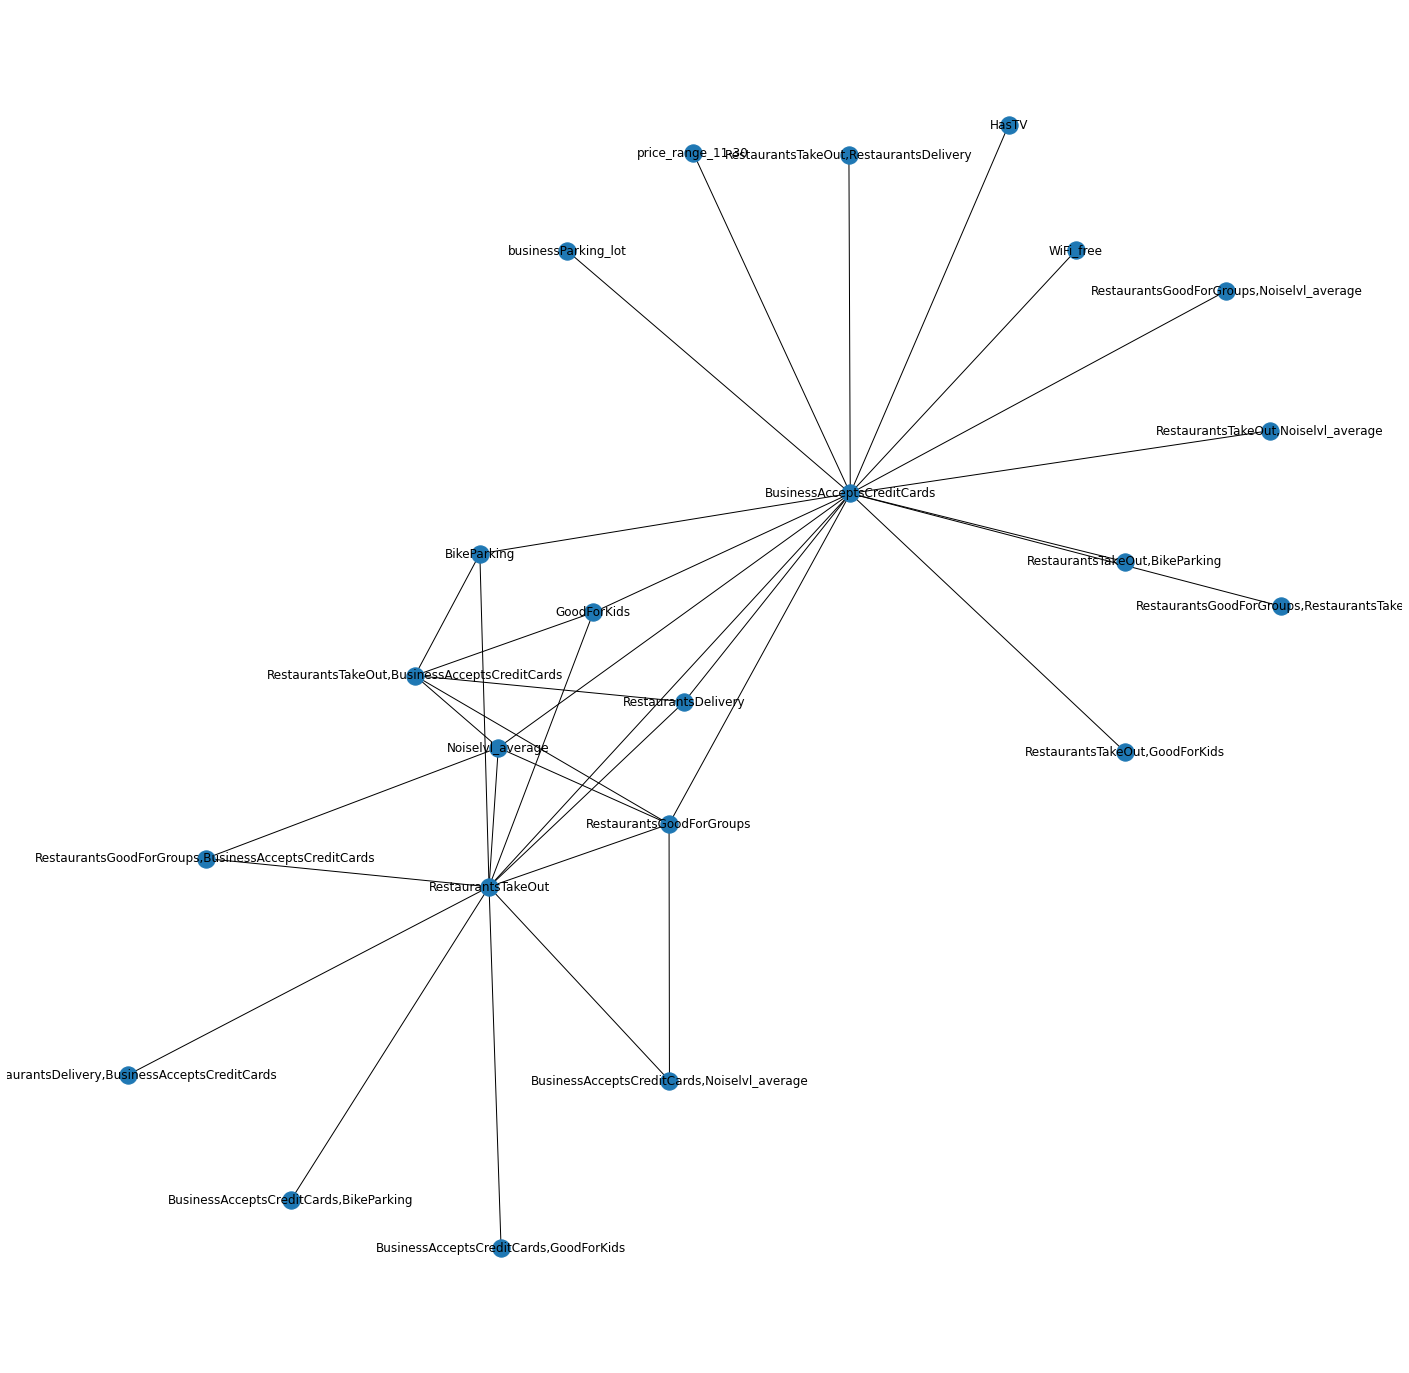

In [0]:
fig, ax=plt.subplots(figsize=(25,25))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,)
plt.show()

In [0]:
rules=rules.loc[rules['support'] > 0.6]

In [0]:
attributes=["BusinessAcceptsCreditCards","RestaurantTakeOut","BikeParking","RrestrauntGoodForGroups"]

In [0]:
biz_attr_pdf_GA=biz_attr_pdf_GA.loc[biz_attr_pdf_GA['business_'] == "GA"]

In [0]:
ra_sushi = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=="s7baMoiG1821_3NblCfK6w"]
business_2 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='hmrRb7qX3K705MuxHHfgNA']
business_3 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='B_6V-u97NU8aai4mrKqwNw']
business_4 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='kD1mjIbvczeXBxDSluJaOw']
business_5 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id== '6Rq3Bcs969L60aoMGIs5FQ']
business_6 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='7Gub6fxNR1kkPp2MKm2ikw']
business_7 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='MeQegzmVVKNuu-ojlszjRQ']
business_8 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='_vocxUlPxxOafG18HE_B-A']
business_9 = biz_attr_pdf_GA[biz_attr_pdf_GA.business_id=='CcIS8RDNCtJUbxCduIEyAg']

In [0]:
name=["RA Sushi Bar Restaurant","Cafe Intermezzo - Midtown","Silverlake Ramen","DUA Vietnamese Noodle Soup","Sam’s Of San Francisco","Rí Rá Irish Pub","Ribalta","The Federal","Sugar Factory"]

attributes=["BusinessAcceptsCreditCards","RestaurantsTakeOut","BikeParking","RrestrauntGoodForGroups"]

cc=[True,True,False,True,False,True,True,True,True]
to=[True,True,True,True,True,True,True,True,True]
bp=[True,True,False,False,False,True,True,True,True]
grp=[True,True,False,True,False,True,True,True,False]
noise=[True,True,False,False,False,True,True,True,False]
kids=[False,True,False,False,False,True,True,False,False]

attr_comparison=pd.DataFrame(list(zip(name,cc, to,bp,grp,noise,kids)),
              columns=['Business',"AcceptCreditCard",'TakeOut',"BikeParking","GoodforGroups","AverageNoiseLevel","GoodforKids"])
attr_comparison

,Business,AcceptCreditCard,TakeOut,BikeParking,GoodforGroups,AverageNoiseLevel,GoodforKids
0,RA Sushi Bar Restaurant,True,True,True,True,True,False
1,Cafe Intermezzo - Midtown,True,True,True,True,True,True
2,Silverlake Ramen,False,True,False,False,False,False
3,DUA Vietnamese Noodle Soup,True,True,False,True,False,False
4,Sam’s Of San Francisco,False,True,False,False,False,False
5,Rí Rá Irish Pub,True,True,True,True,True,True
6,Ribalta,True,True,True,True,True,True
7,The Federal,True,True,True,True,True,False
8,Sugar Factory,True,True,True,False,False,False


In [0]:
fig = go.Figure(data=[go.Table(
    header=dict(values=('Business'," Accept Credit Card",'Take Out',"Bike Parking","Good for Gorups","Average Noise Level","Good for Kids"),
                fill_color='bisque',
                align='left'),
    cells=dict(values=[attr_comparison.Business, attr_comparison.AcceptCreditCard,attr_comparison.TakeOut,attr_comparison.BikeParking,attr_comparison.GoodforGroups,attr_comparison.AverageNoiseLevel,attr_comparison.GoodforKids],
               fill_color='whitesmoke',
               align='left'))
])

fig.show()
